Install the yfinance package, which is the downloader connected with the Yahoo Fiannce API.



In [27]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [28]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl

##   1a. Major crypto currency chosen:Bitcoin-usd

1b. Download btc-usd daily historical two years data and save it as btc-usd pandas data frame



In [29]:
initial_data = yf.download("BTC-USD", start="2021-06-25", end="2023-06-25")

[*********************100%***********************]  1 of 1 completed


In [30]:
initial_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-25,34659.105469,35487.246094,31350.884766,31637.779297,31637.779297,40230904226
2021-06-26,31594.664062,32637.587891,30184.501953,32186.277344,32186.277344,38585385521
2021-06-27,32287.523438,34656.128906,32071.757812,34649.644531,34649.644531,35511640894
2021-06-28,34679.121094,35219.890625,33902.074219,34434.335938,34434.335938,33892523752
2021-06-29,34475.558594,36542.109375,34252.484375,35867.777344,35867.777344,37901460044


In [31]:
initial_data['Adj Close'].head()

Date
2021-06-25    31637.779297
2021-06-26    32186.277344
2021-06-27    34649.644531
2021-06-28    34434.335938
2021-06-29    35867.777344
Name: Adj Close, dtype: float64

adjusted close price

In [32]:
data =  initial_data['Adj Close']
data.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 730 entries, 2021-06-25 to 2023-06-24
Series name: Adj Close
Non-Null Count  Dtype  
--------------  -----  
730 non-null    float64
dtypes: float64(1)
memory usage: 11.4 KB


plotting the movement/shape of BTC-USD from November 2020 to November 2022 and subsequently calculating its annualised volatility

fig 1.0

array([<AxesSubplot:xlabel='Date'>], dtype=object)

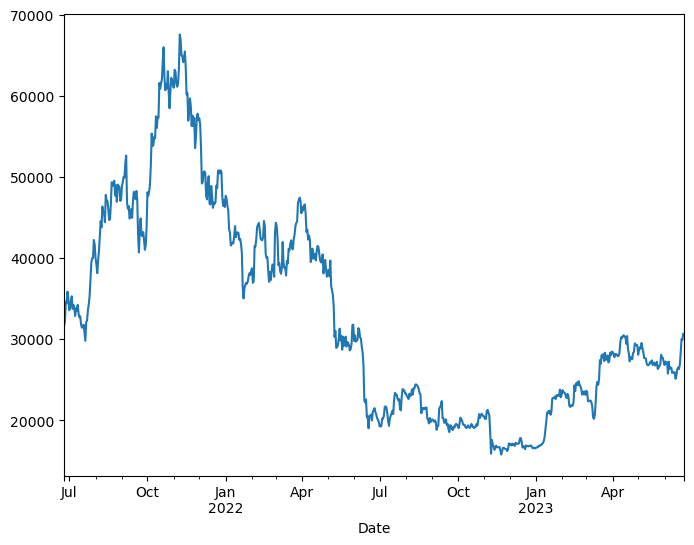

In [33]:
data.plot(figsize=(8, 6), subplots=True)

calculating the annualized return

In [34]:
data = yf.download("BTC-USD", start="2022-06-04", end="2023-06-04")

[*********************100%***********************]  1 of 1 completed


In [35]:
log_return = np.log(data['Adj Close'] / data['Adj Close'].shift(1))

In [36]:
vol = np.sqrt(365) * log_return.std()
print('The annualised volatility is', round(vol*100,2), '%')

The annualised volatility is 57.11 %


designing the derivative

a. Design a derivative and its associated pricing value using at least two methods which must be different.

Designing the vanilla derivative using the first model:

Black Scholes method

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si
import yfinance as yf

In [38]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

where S= spot price, k=strike price, T= time to maturity, r=interest rate, vol= volatility


In [39]:
s = 31637
K = 32186
T = 0.08   # 1 Year 
r = 0.04
q = 0
v = 0.7

In [40]:
euro_option_bs(s, K, T, r, vol, 'call')

2281.8074594238224

Designing the vanilla derivative using the first model:
# monte Carlo Simulation

In [41]:
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [42]:
T = 0.08
r = 0.04
sigma = 0.7
S0 =31637
K = 32186

In [43]:
S = mcs_simulation_np(100)

In [44]:
S = np.transpose(S)
S


array([[31637.        , 32119.23702999, 31366.81508761, ...,
        38037.64309351, 37480.85729181, 37430.03896165],
       [31637.        , 31872.93252925, 31035.49986198, ...,
        23802.57565578, 24286.38828796, 24733.65004186],
       [31637.        , 31436.82442785, 31316.60689245, ...,
        29049.89984018, 29823.79173772, 29959.20955572],
       ...,
       [31637.        , 30969.10924907, 31994.3503265 , ...,
        27693.44468815, 27241.33678847, 27234.7741627 ],
       [31637.        , 30861.78647861, 31043.4842041 , ...,
        36030.06833145, 37004.08398477, 38047.42283433],
       [31637.        , 30903.07747463, 30910.81144425, ...,
        17241.12171764, 17153.96868812, 16752.68458872]])

In [45]:
c = np.mean(np.maximum(S[:,-1] - K,0))
print('European call', str(c))

European call 2408.21498703138


Greeks¶

1.DELTA Delta, ∆, measures the rate of change of the theoretical option value with respect to changes in the underlying asset's price. Delta is the first derivative of the value V of the option with respect to the underlying instrument's price S.

In [46]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta



In [48]:
S = np.linspace(50,150,11)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 31637, 0.08, 0.04, 0, 0.7, 'call')

In [60]:
delta(31637, 32186, 0.08, 0.04, 0, 0.7, 'call')

0.5112737197641347

if the underlying asset price decrease from 31637 to 31636: call option value will reduce by $0.51 (dollars



In [64]:
S = np.linspace(50,150,11)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 31637, 0.08, 0.04, 0, 0.7, 'call')

2.GAMMA¶

Gamma, Γ, measures the rate of change in the delta with respect to changes in the underlying price. Gamma is the second derivative of the value function with respect to the underlying price.



In [65]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma




In [66]:
gamma(31637, 32186, 0.08, 0.04, 0, 0.7, 'call')

6.36646394385193e-05

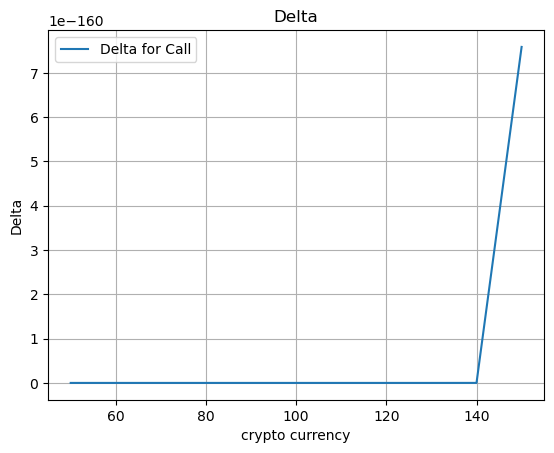

In [67]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.grid()
plt.xlabel('crypto currency')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call'])


2.GAMMA


Gamma, Γ, measures the rate of change in the delta with respect to changes in the underlying price. Gamma is the second derivative of the value function with respect to the underlying price.




In [68]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma




In [69]:
gamma(31637, 32186, 0.08, 0.04, 0, 0.7, 'call')

6.36646394385193e-05

if the underlying asset price increase from 31637 to 31638 the call option for Delta will increase by 6.37

In [70]:
S = np.linspace(50,150,11)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 31637, 0.08, 0.04, 0, 0.7, 'call')


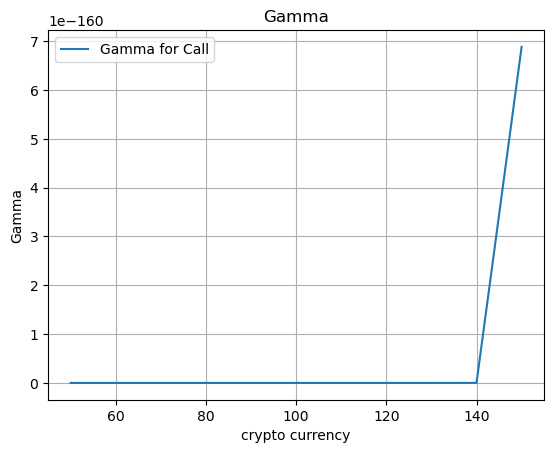

In [71]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('crypto currency')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call' ])



3. SPEED¶¶

Speed measures the rate of change in Gamma with respect to changes in the underlying price

In [72]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [73]:
speed(31637, 32186, 0.08, 0.04, 0, 0.7, 'call')


-6.504271966366823e-10

when the underlying asset price change from 31637 to 31636 then the gamma will decrease by 6.504

In [74]:
S = np.linspace(50,150,11)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 31637, 32186, 0.08, 0.04, 0.7, 'call')


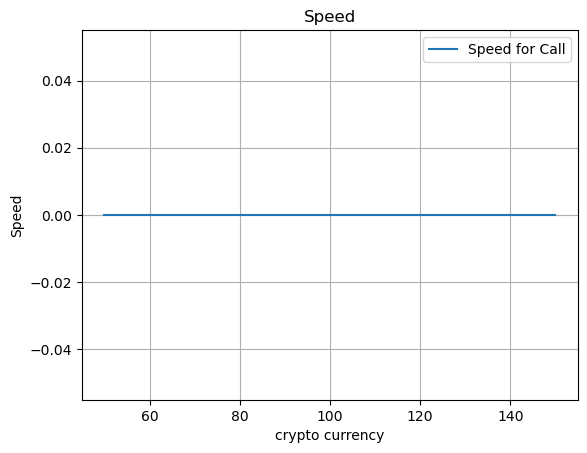

In [75]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('crypto currency')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Call'])

4.theta

Theta, 𝜃, measures the sensitivity of the value of the derivative to the passage of time (see Option time value): the "time decay"

In [78]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) + q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) - r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta


In [79]:
theta(31637, 32186, 0.08, 0.04, 0, 0.7, 'call')

16167.054157905304

when there is an increase in time then call option value will increase by $16167.

In [80]:
T = np.linspace(0.25,3,12)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(31637, 32186, 0.08, 0.04, 0, 0.7, 'call')

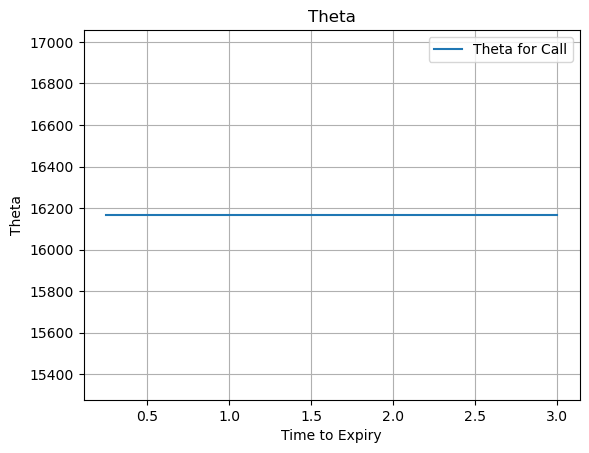

In [81]:
fig = plt.figure()
plt.plot(T, Theta_Call, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call' ])

RHO

In [82]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [83]:
rho(31637, 32186, 0.08, 0.04, 0, 0.7, 'call')



1110.3660911443083

if the interest rate increase by 1% then call price will increase by $11.1

In [84]:
r = np.linspace(0,0.1,11)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Call [i] = rho(31637, 32186, 0.08, 0.04, 0, 0.7, 'call')

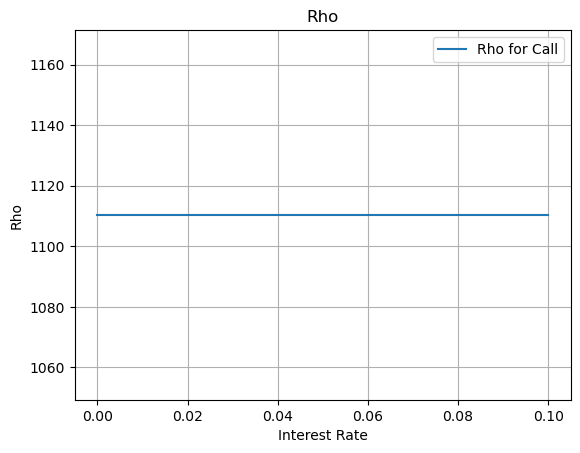

In [85]:
fig = plt.figure()
plt.plot(r, Rho_Call, '-')

plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call', ])